need to submit all docs and video on learn mod 2 final project

1. go back and test for normality of the samples we have
2. if not normal, do a resampling
(or can i do a kolmogorov smirov test?



what do the metrics mean?  (on presentation)

for all questions -- dig "one level below the obvious"


sales ppl
-time period and how long at company

look at category per region


add slide with take aways

does a t test make sense for all questions?

look at effect sizes (cohen D) 



# Case Study: Northwind Traders


Four questions to consider:<br>
1. Do discounted items sell in greater volume?  And if so, does the level of discount have an impact?
2. Do all regions perform equally in terms of quantities sold?
3. Are all salespeople created equal or do we have any under/over-performers?
4. Should we consider discontinuing any items and conversely, should we consider increasing market share in other categories?

## convert sql database tables into pandas dataframes


##### import packages and modules

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
import scipy.stats as stats
from math import sqrt
import math
import copy
import statsmodels.api as sm             #for ANOVA
from statsmodels.formula.api import ols  #for ANOVA

import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import session, sessionmaker
from sqlalchemy import inspect # so we can perform high level investigations


import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('seaborn')
from matplotlib import style

pd.set_option('display.max_columns', None)

##### creating an engine object and a session to connect and work with the Northwind sql db

In [2]:
engine = create_engine("sqlite:///Northwind_small.sqlite", echo = True)
Session = sessionmaker(bind = engine)
session = Session
inspector = inspect(engine)

2019-05-16 15:06:04,421 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-05-16 15:06:04,425 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,426 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-05-16 15:06:04,427 INFO sqlalchemy.engine.base.Engine ()


##### lets have a look at the tables we will be working with and get to know them better

In [3]:
inspector.get_table_names()

2019-05-16 15:06:04,434 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-05-16 15:06:04,435 INFO sqlalchemy.engine.base.Engine ()


['Category',
 'Customer',
 'CustomerCustomerDemo',
 'CustomerDemographic',
 'Employee',
 'EmployeeTerritory',
 'Order',
 'OrderDetail',
 'Product',
 'Region',
 'Shipper',
 'Supplier',
 'Territory']

##### For the first question, we only need Quantity and Discount though, I will map all tables since we will need them later

##### map the db table features with their headings

In [4]:
from sqlalchemy import MetaData
from sqlalchemy.ext.automap import automap_base # creates a framework that clones the db structure so that it can generate a 
                                                  # a new model in which to map the db with its metadata, ie, column headings

In [5]:
metadata = MetaData()
metadata.reflect(engine)
Base = automap_base(metadata = metadata)
Base.prepare()



Category, Customer, CustomerCustomerDemo, CustomerDemographic, Employee, EmployeeTerritory, Order, OrderDetail,\
Product, Region, Shipper, Supplier, Territory = \
Base.classes.Category,\
Base.classes.Customer,\
Base.classes.CustomerCustomerDemo,\
Base.classes.CustomerDemographic, \
Base.classes.Employee, \
Base.classes.EmployeeTerritory,\
Base.classes.Order,\
Base.classes.OrderDetail, \
Base.classes.Product, \
Base.classes.Region,\
Base.classes.Shipper, \
Base.classes.Supplier, \
Base.classes.Territory

2019-05-16 15:06:04,459 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-05-16 15:06:04,461 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,462 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-05-16 15:06:04,463 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,465 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-05-16 15:06:04,466 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,468 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Category")
2019-05-16 15:06:04,469 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,470 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-05-16 15:06:04,471 INFO sqlalchemy.engine.base.Engin

2019-05-16 15:06:04,544 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("EmployeeTerritory")
2019-05-16 15:06:04,545 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,546 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'EmployeeTerritory' AND type = 'table'
2019-05-16 15:06:04,547 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,548 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-05-16 15:06:04,548 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,550 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-05-16 15:06:04,550 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,552 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("sqlite_autoindex_EmployeeTerritory_1")
2019-05-16 15:06:04,552 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,553 INFO sqlalchemy.engine.base.Engine SELECT sql 

2019-05-16 15:06:04,619 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Supplier")
2019-05-16 15:06:04,619 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,622 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-05-16 15:06:04,623 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,624 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Supplier")
2019-05-16 15:06:04,625 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,626 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-05-16 15:06:04,627 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,627 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("Supplier")
2019-05-16 15:06:04,628 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,629 INFO 

##### converting each mapped table to a pandas dataframe

In [6]:
category_df= pd.read_sql_query("SELECT * FROM [category]", engine)
customer_df = pd.read_sql_query("SELECT * FROM [customer]", engine)
customerCustomerDemo_df = pd.read_sql_query("SELECT * FROM [customerCustomerDemo]", engine)
customerDemographic_df = pd.read_sql_query("SELECT * FROM [customerDemographic]", engine)
employee_df = pd.read_sql_query("SELECT * FROM [employee]", engine)
employeeTerritory_df = pd.read_sql_query("SELECT * FROM [employeeTerritory]", engine)
order_df = pd.read_sql_query("SELECT * FROM [order]", engine)
orderDetail_df = pd.read_sql_query("SELECT * FROM [orderDetail]", engine)
product_df = pd.read_sql_query("SELECT * FROM [product]", engine)
region_df = pd.read_sql_query("SELECT * FROM [region]", engine)
shipper_df = pd.read_sql_query("SELECT * FROM [shipper]", engine)
supplier_df = pd.read_sql_query("SELECT * FROM [supplier]", engine)
territory_df = pd.read_sql_query("SELECT * FROM [territory]", engine)

2019-05-16 15:06:04,677 INFO sqlalchemy.engine.base.Engine SELECT * FROM [category]
2019-05-16 15:06:04,678 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,682 INFO sqlalchemy.engine.base.Engine SELECT * FROM [customer]
2019-05-16 15:06:04,683 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,690 INFO sqlalchemy.engine.base.Engine SELECT * FROM [customerCustomerDemo]
2019-05-16 15:06:04,691 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,694 INFO sqlalchemy.engine.base.Engine SELECT * FROM [customerDemographic]
2019-05-16 15:06:04,695 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,698 INFO sqlalchemy.engine.base.Engine SELECT * FROM [employee]
2019-05-16 15:06:04,699 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,704 INFO sqlalchemy.engine.base.Engine SELECT * FROM [employeeTerritory]
2019-05-16 15:06:04,704 INFO sqlalchemy.engine.base.Engine ()
2019-05-16 15:06:04,708 INFO sqlalchemy.engine.base.Engine SELECT * FROM [order]
2019-05-16 

##### For question one, we need Quantity and Discount features, which are in the Order Detail table

In [7]:
orderDetail_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


create a new instance of the data we need instead of a pointer

In [8]:
q1df = copy.deepcopy(orderDetail_df[["Quantity", "Discount"]])
q1df.head()

,Quantity,Discount
0,12,0.0
1,10,0.0
2,5,0.0
3,9,0.0
4,40,0.0


In [9]:
q1df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 2 columns):
Quantity    2155 non-null int64
Discount    2155 non-null float64
dtypes: float64(1), int64(1)
memory usage: 33.8 KB


no need to change data types

In [10]:
q1df.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

##### remove irrelevant discount levels based on the extremely low number of observations

In [11]:
q1df = copy.deepcopy(q1df[q1df.Discount.isin([ 0.05, 0.10, 0.20, 0.15, 0.25, 0.00])])

##### must split discount column into two groups; one for those with and another without a discount

In [12]:
q1_wDis = q1df[q1df.Discount > 0.0]
q1_woDis = q1df[q1df.Discount == 0.0]

In [13]:
wDisAvg = q1_wDis['Quantity'].mean()
wDisAvg

27.35421686746988

In [14]:
wOdisAvg = q1_woDis['Quantity'].mean()
wOdisAvg

21.715261958997722

In [15]:
print(q1_wDis.Quantity.mean())
print(q1_woDis.Quantity.mean())

27.35421686746988
21.715261958997722


## Question 1: 
##### is there a difference in quantity ordered between no discount and having a discount?

$H_O$: There is no difference in the average quantity ordered between product having and not having a discount<br>
$H_a$: Products having a discount are ordered in greater quantities compared to those not having a discount<br>

this is a one tail test

lets have a look at the two distributions for a better sense of what the outcome may be and to be sure they satisfy assumptions required to perform a t-test

C:\Users\mngav\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


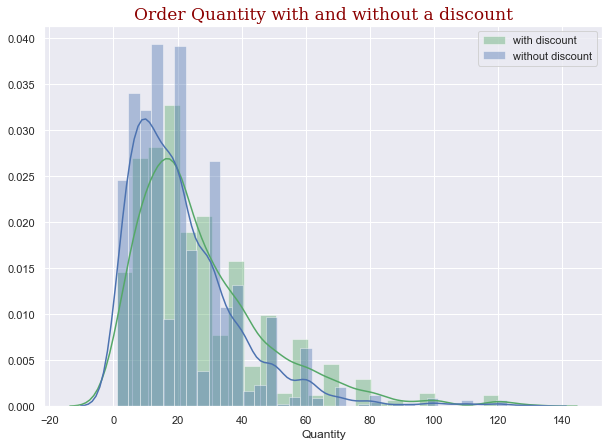

In [16]:
plt.style.use("dark_background")
#sns.set_color_codes("bright")
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(q1_wDis.Quantity, color = "g", label = "with discount") 
sns.distplot(q1_woDis.Quantity, color = "b", label = "without discount") 

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 17,
        }

plt.title("Order Quantity with and without a discount", fontdict=font)
plt.legend()

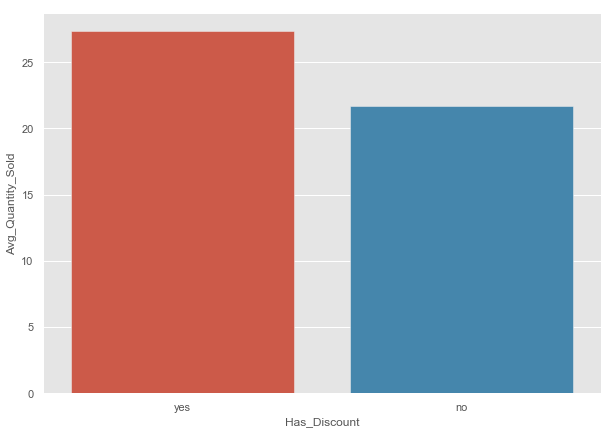

In [17]:
#sns.set(style = "whitegrid")
#sns.set_context( "notebook")
data = pd.DataFrame([wDisAvg, wOdisAvg])
data.columns = ["Avg_Quantity_Sold"]
data['Has_Discount'] = ['yes', 'no']
plt.style.use('ggplot')
width = .25
ax = sns.barplot(x= "Has_Discount", y="Avg_Quantity_Sold", data=data)




In [18]:
print("skewness for distribution with discount is:", skew(q1_wDis.Quantity))
print("skewness for distribution without discount is:", skew(q1_woDis.Quantity))

skewness for distribution with discount is: 1.5909370768885505
skewness for distribution without discount is: 1.9115988573935339


##### The distributions have a semblance of normality but are highly skewed with a measure of ~1.6 and 1.9 for distributions with a discount and without a discount, respectively.  This makes sense since we cant sell a negative amount of products

lets get our t statistic and p value

In [19]:
stats.ttest_ind( q1_wDis.Quantity, q1_woDis.Quantity, equal_var = False)

Ttest_indResult(statistic=6.511219067380875, pvalue=1.0051255540843165e-10)

##### Conclusion part 1a<br>
our t value tells us we have a significant difference in sample mean with T stat of 6.5 thats greater than the critical value of 1.646 and the p value tells us there is a very small probability the result is by chance so, we have evidence to reject the null hypothesis and accept the alternative, i.e., we have sufficient evidence to assert that discounts do have a statistically significant effect on order quantities. 

for the next part of the question, we will dig a bit deeper to determine if there is a certain level of discount that precipitates an increase in order size, or not

will separate/bin the discount levels so we can compare each experiment group to the control

In [20]:
df_05 = q1df[q1df.Discount == 0.05]
df_10 = q1df[q1df.Discount == 0.10]
df_15 = q1df[q1df.Discount == 0.15]
df_20 = q1df[q1df.Discount == 0.20]
df_25 = q1df[q1df.Discount == 0.25]

Now we will run a t test for each experiment group and compare it to the control group which has no discount

In [21]:
stats.ttest_ind(df_05.Quantity, q1_woDis.Quantity, equal_var = False)

Ttest_indResult(statistic=3.700844260760871, pvalue=0.00027233494432847593)

In [22]:
stats.ttest_ind( df_10.Quantity, q1_woDis.Quantity, equal_var = False)

Ttest_indResult(statistic=2.094434281933477, pvalue=0.0374559661063408)

In [23]:
stats.ttest_ind( df_15.Quantity, q1_woDis.Quantity, equal_var = False)

Ttest_indResult(statistic=3.8356620426605934, pvalue=0.00017220729443627393)

In [24]:
stats.ttest_ind( df_20.Quantity, q1_woDis.Quantity, equal_var = False)

Ttest_indResult(statistic=3.4021239132172787, pvalue=0.0008110033254043408)

In [25]:
stats.ttest_ind( df_25.Quantity, q1_woDis.Quantity, equal_var = False)

Ttest_indResult(statistic=3.8572676240072523, pvalue=0.00015923050922125637)

In [26]:
graph2 = pd.DataFrame([3.7, 2.1, 3.8, 3.4, 3.8]) 
graph2.columns =  ["Standard_Deviations_greater_than_mean"]
graph2['Discount_Level'] = [.05, .10, .15, .20, .25]
graph2.head()

,Standard_Deviations_greater_than_mean,Discount_Level
0,3.7,0.05
1,2.1,0.10
2,3.8,0.15
3,3.4,0.20
4,3.8,0.25


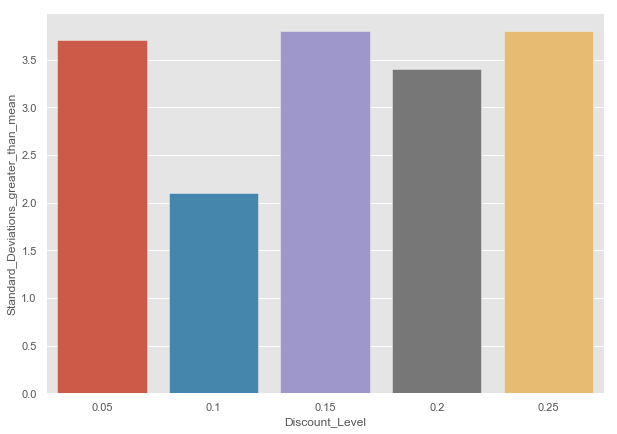

In [27]:

plt.style.use('ggplot')
width = .25
ax = sns.barplot(x= "Discount_Level", y="Standard_Deviations_greater_than_mean", data=graph2)

##### Conclusion part 1b<br>

**Restate the question and hypotheses:**<br>
is there a difference is quantity ordered between no discount and having a discount?<br>
𝐻𝑂: There is no difference in the average quantity ordered between product having and not having a discount<br>
𝐻𝑎: Products having a discount are ordered at greater quantities compared to those not having a discount<br>


We can see that all levels of discount have a significant effect on the quantity of orders though, a 10% discount has a lesser effect compared to the others which are more in line with each other.  <br>
Since there is not much of a difference in the magnitude of effect by the varying discount levels (excluding 10%), it makes sense to use the 5% level in our marketing campaigns since it will produce the same effect in moving product compared to the  highest discount, with the benefit of not having to buy as much demand.

## Question 2 
#### Is there a region that outperforms the others in terms of order quantities?

$H_O$: each region sells the same quantities of product<br>
$H_a$: regions do not sell the same quantities of product<br>

this is a two tailed test

We will need features from other tables so below, we merge all relevant tables after renaming a few features so we are sure to have at least one matching column on which to join on

In [28]:
category_df.rename(columns = {"Id":"CategoryId"}, inplace = True)
cat_prod_df = pd.merge(category_df, product_df, on = "CategoryId" )
cat_prod_df.rename(columns = {"Id": "ProductId"}, inplace = True)
cat_prod_OrDtl_df = pd.merge(cat_prod_df, orderDetail_df, on = "ProductId")
order_df.rename(columns = {"Id" : "OrderId"}, inplace = True)
cat_prod_OrDtl_orders_df = pd.merge(cat_prod_OrDtl_df, order_df, on = "OrderId" )
customer_df.rename(columns ={"Id": "CustomerId"}, inplace = True)
data = pd.merge(cat_prod_OrDtl_orders_df, customer_df, on = "CustomerId")
data.head()

,CategoryId,CategoryName,Description,ProductId,ProductName,SupplierId,QuantityPerUnit,UnitPrice_x,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id,OrderId,UnitPrice_y,Quantity,Discount,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,1,10 boxes x 20 bags,18.0,39,0,10,0,10285/1,10285,14.4,45,0.2,QUICK,1,2012-08-20,2012-09-17,2012-08-26,2,76.83,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
1,6,Meat/Poultry,Prepared meats,53,Perth Pasties,24,48 pieces,32.8,0,0,0,1,10285/53,10285,26.2,36,0.2,QUICK,1,2012-08-20,2012-09-17,2012-08-26,2,76.83,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
2,8,Seafood,Seaweed and fish,40,Boston Crab Meat,19,24 - 4 oz tins,18.4,123,0,30,0,10285/40,10285,14.7,40,0.2,QUICK,1,2012-08-20,2012-09-17,2012-08-26,2,76.83,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
3,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,1,10 boxes x 20 bags,18.0,39,0,10,0,10691/1,10691,18.0,30,0.0,QUICK,2,2013-10-03,2013-11-14,2013-10-22,2,810.05,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
4,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",43,Ipoh Coffee,20,16 - 500 g tins,46.0,17,10,25,0,10691/43,10691,46.0,40,0.0,QUICK,2,2013-10-03,2013-11-14,2013-10-22,2,810.05,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2077
Data columns (total 40 columns):
CategoryId         2078 non-null int64
CategoryName       2078 non-null object
Description        2078 non-null object
ProductId          2078 non-null int64
ProductName        2078 non-null object
SupplierId         2078 non-null int64
QuantityPerUnit    2078 non-null object
UnitPrice_x        2078 non-null float64
UnitsInStock       2078 non-null int64
UnitsOnOrder       2078 non-null int64
ReorderLevel       2078 non-null int64
Discontinued       2078 non-null int64
Id                 2078 non-null object
OrderId            2078 non-null int64
UnitPrice_y        2078 non-null float64
Quantity           2078 non-null int64
Discount           2078 non-null float64
CustomerId         2078 non-null object
EmployeeId         2078 non-null int64
OrderDate          2078 non-null object
RequiredDate       2078 non-null object
ShippedDate        2008 non-null object
ShipVia            2

Lets isolate Region and Quantity so we can answer our second question

In [30]:
q2df = data[["Region", "Quantity"]]
q2df.head()
q2df.Region.value_counts()

Western Europe     736
North America      427
South America      304
British Isles      190
Northern Europe    143
Southern Europe    137
Scandinavia         70
Central America     55
Eastern Europe      16
Name: Region, dtype: int64

In [31]:
q2df["Region"] = q2df["Region"].astype("category") #convert feature to category type
q2df["Region"] = q2df.Region.cat.codes             # lable encode--convert text into numbers
q2df.head()
#q2df.Region.value_counts()

C:\Users\mngav\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mngav\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Region,Quantity
0,8,45
1,8,36
2,8,40
3,8,30
4,8,40


In [32]:
q2df = pd.get_dummies(q2df, columns = ["Region"]) # one-hot-encode


In [33]:
q2df = copy.deepcopy(q2df) # createa a new image of our df instead of just pointing to the data which could lead to errors
q2df.head()

,Quantity,Region_0,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8
0,45,0,0,0,0,0,0,0,0,1
1,36,0,0,0,0,0,0,0,0,1
2,40,0,0,0,0,0,0,0,0,1
3,30,0,0,0,0,0,0,0,0,1
4,40,0,0,0,0,0,0,0,0,1


In [34]:
m = q2df.set_index('Quantity')
n = m[m.eq(1)]

In [35]:
m=q2df.set_index('Quantity')
n=m[m.eq(1)]
d={'df_'+str(i):n[i].dropna().to_frame() for i in n.columns}

In [36]:
type(d)

dict

In [37]:
d['df_Region_0'].head()

,Region_0
Quantity,
15,1.0
35,1.0
30,1.0
18,1.0
40,1.0


In [38]:
type(d['df_Region_0'].head())

pandas.core.frame.DataFrame

##### Lets use an ANOVA test to compare the different groups with the control

In [39]:
formula = "Quantity ~ C(Region_0) + C(Region_1) + C(Region_2) + C(Region_3) + C(Region_4) + C(Region_5)\
+ C(Region_6) + C(Region_7) + C(Region_8)"
           
lm = ols(formula, q2df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                    sum_sq      df           F        PR(>F)
C(Region_0)    5771.108001     1.0   16.561567  4.886478e-05
C(Region_1)    1982.623241     1.0    5.689609  1.715519e-02
C(Region_2)     466.230842     1.0    1.337960  2.475275e-01
C(Region_3)   25057.877279     1.0   71.909538  4.220311e-17
C(Region_4)    5486.219915     1.0   15.744013  7.498839e-05
C(Region_5)     600.807523     1.0    1.724160  1.893040e-01
C(Region_6)    2693.291573     1.0    7.729041  5.483135e-03
C(Region_7)     934.537403     1.0    2.681877  1.016481e-01
C(Region_8)   41507.489166     1.0  119.115612  5.296972e-27
Residual     720971.784575  2069.0         NaN           NaN


| Region          	| Code 	|
|-----------------	|------	|
| Western Europe  	| 8    	|
| North America   	| 3    	|
| South America   	| 6    	|
| British Isles   	| 0    	|
| Northern Europe 	| 4    	|
| Southern Europe 	| 7    	|
| Scandinavia     	| 5    	|
| Central America 	| 1    	|
| Eastern Europe  	| 2    	|

In [40]:
region_table = pd.DataFrame(["Britsh_Isles", "Central_America", "Eastern_Europe", "North_America", "Northern_Europe", 
                            "Scandinavia", "South_America", "Southern_Europe", "Western_Europe"])
region_table.columns = ["Region"]
region_table["Avg_Sales_vs_Mean"] = [16.5, 5.6, 1.3, 72, 15.7, 1.7, 7.7, 2.7, 119]
region_table.head()

,Region,Avg_Sales_vs_Mean
0,Britsh_Isles,16.5
1,Central_America,5.6
2,Eastern_Europe,1.3
3,North_America,72.0
4,Northern_Europe,15.7


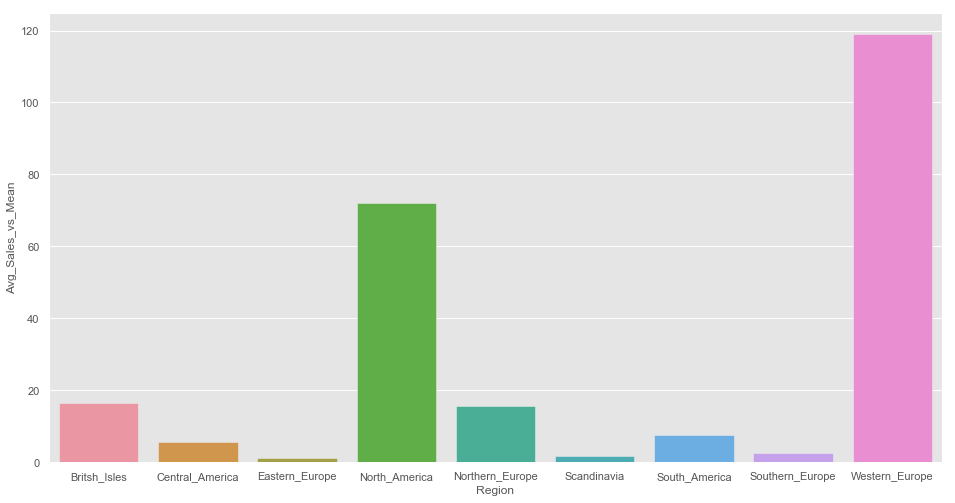

In [41]:
sns.set(rc={'figure.figsize':(16,8.27)})
plt.style.use('ggplot')

ax = sns.barplot(x= "Region", y="Avg_Sales_vs_Mean", data=region_table)

##### Conclusion Question 2 <br>
**restate the question and hypotheses:**<br>
 Is there a region that outperforms the others in terms of order quantities?<br>
𝐻𝑂: each region sells the same quantities of product<br>
𝐻𝑎: regions do not sell the same quantities of product<br>

From the above ANOVA table, we see that we have significant events for all regions except for Eastern Europe, Southern Europe and Scandinavia. Of the regions with significant events, North America and Western Europe have average sales that far exceed the others.  This is no surprise since they are the largest economies of the given regions.  


## Question 3
#### are there any salespeople that stand out?

$H_O$: all sales peoples performance are identical <br>
$H_a$: some sales people do better than others and some do worse<br>

this is a two tailed test

pull the features we need into a dataframe

In [42]:
q3df = data[["Quantity", "EmployeeId"]]
q3df.head()

,Quantity,EmployeeId
0,45,1
1,36,1
2,40,1
3,30,2
4,40,2


In [43]:
q3df.EmployeeId.value_counts()

4    408
1    341
3    313
8    248
2    237
6    161
7    150
5    113
9    107
Name: EmployeeId, dtype: int64

we can use all the data here

EmployeeId is already numeric so, can skip label encoding and go straight to get dummies

In [44]:
q3dfv2 = copy.deepcopy(pd.get_dummies(q3df, columns = ["EmployeeId"])) # one-hot-encode

In [45]:
q3dfv2.head()

,Quantity,EmployeeId_1,EmployeeId_2,EmployeeId_3,EmployeeId_4,EmployeeId_5,EmployeeId_6,EmployeeId_7,EmployeeId_8,EmployeeId_9
0,45,1,0,0,0,0,0,0,0,0
1,36,1,0,0,0,0,0,0,0,0
2,40,1,0,0,0,0,0,0,0,0
3,30,0,1,0,0,0,0,0,0,0
4,40,0,1,0,0,0,0,0,0,0


In [46]:
formula = "Quantity ~ C(EmployeeId_1) + C(EmployeeId_2) + C(EmployeeId_3) + C(EmployeeId_4) + C(EmployeeId_5) + C(EmployeeId_6)\
+ C(EmployeeId_7) + C(EmployeeId_8) + C(EmployeeId_9)"
           
lm = ols(formula, q3dfv2).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                        sum_sq      df          F    PR(>F)
C(EmployeeId_1)     340.854936     1.0   0.932931  0.334215
C(EmployeeId_2)    3147.921070     1.0   8.615959  0.003369
C(EmployeeId_3)    2624.747864     1.0   7.184018  0.007414
C(EmployeeId_4)    1187.522249     1.0   3.250286  0.071556
C(EmployeeId_5)    1750.678322     1.0   4.791662  0.028709
C(EmployeeId_6)     191.146586     1.0   0.523174  0.469573
C(EmployeeId_7)    6447.632335     1.0  17.647373  0.000028
C(EmployeeId_8)     206.650793     1.0   0.565610  0.452094
C(EmployeeId_9)    1267.128031     1.0   3.468169  0.062702
Residual         755928.433022  2069.0        NaN       NaN


In [47]:
q3table = pd.DataFrame(['Emp1', 'Emp2', 'Emp3', 'Emp4', 'Emp5', 'Emp6', 'Emp7', 'Emp8', 'Emp9'])
q3table.columns = ["Employee"]
q3table["Performance Vs Mean"] = [1, 8.6, 7, 3.25, 4.8, 0.5, 17.6, 0.6, 3.5]
q3table.head()

,Employee,Performance Vs Mean
0,Emp1,1.00
1,Emp2,8.60
2,Emp3,7.00
3,Emp4,3.25
4,Emp5,4.80


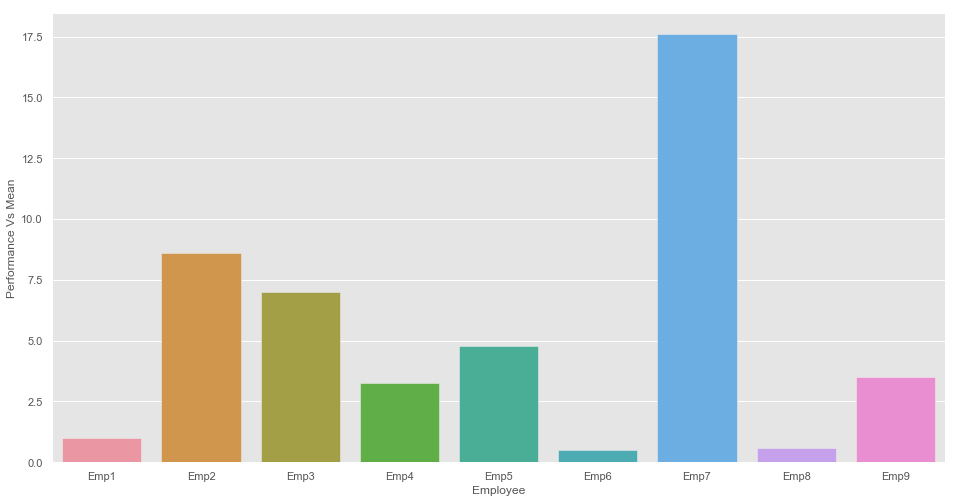

In [48]:
sns.set(rc={'figure.figsize':(16,8.27)})
plt.style.use('ggplot')

ax = sns.barplot(x= "Employee", y="Performance Vs Mean", data=q3table)

##### Conclusion Question 3 <br> 

**Restate the question and hypotheses:**<br>
 are there any salespeople that stand out?<br>
 
𝐻𝑂: all sales peoples performance are identical <br>
𝐻𝑎: some sales people do better than others and some do worse<br>

we don't have sufficient data to say anything about employees 1, 6 or 8 though, we should gather more data, look deeper and think about training, culture, morale...etc.
Employee seven looks like a superstar on paper but we need to dig deeper to make sure it is her work that is creating the success and not some kind of 'gift' such as being the only salesperson in a region that needs several, or stable and high-growth company she has been relying on, ie, can this person reproduce the results anywhere?  maybe they can distribute some wisdom to our other salespeople. 

## Question 4
#### are there any categories we should think about dicontinuing or expanding on?

$H_O$: orders of categories are equal in quantity <br>
$H_a$: orders by category are not equal<br>

this is a two tailed test

In [49]:
q4df = data[["Quantity", "CategoryId"]]
q4df.CategoryId.value_counts()

1    389
4    350
3    321
8    319
2    209
5    190
6    168
7    132
Name: CategoryId, dtype: int64

In [50]:
q4df = copy.deepcopy(pd.get_dummies(q4df, columns = ["CategoryId"])) # one-hot-encode

In [51]:
q4df.head()

,Quantity,CategoryId_1,CategoryId_2,CategoryId_3,CategoryId_4,CategoryId_5,CategoryId_6,CategoryId_7,CategoryId_8
0,45,1,0,0,0,0,0,0,0
1,36,0,0,0,0,0,1,0,0
2,40,0,0,0,0,0,0,0,1
3,30,1,0,0,0,0,0,0,0
4,40,1,0,0,0,0,0,0,0


In [52]:
formula = "Quantity ~ C(CategoryId_1) + C(CategoryId_2) + C(CategoryId_3) + C(CategoryId_4) + C(CategoryId_5) + C(CategoryId_6)\
+ C(CategoryId_7) + C(CategoryId_8) "
           
lm = ols(formula, q4df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                        sum_sq      df          F    PR(>F)
C(CategoryId_1)    2052.627558     1.0   5.586198  0.018194
C(CategoryId_2)    2992.424170     1.0   8.143841  0.004364
C(CategoryId_3)    2391.615514     1.0   6.508749  0.010806
C(CategoryId_4)    5522.924774     1.0  15.030564  0.000109
C(CategoryId_5)    1134.337271     1.0   3.087083  0.079064
C(CategoryId_6)    2083.430253     1.0   5.670027  0.017347
C(CategoryId_7)     142.712229     1.0   0.388389  0.533216
C(CategoryId_8)    2197.735170     1.0   5.981106  0.014543
Residual         760613.779368  2070.0        NaN       NaN


In [53]:
q4table = pd.DataFrame([])

In [54]:
data.head(30)


,CategoryId,CategoryName,Description,ProductId,ProductName,SupplierId,QuantityPerUnit,UnitPrice_x,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id,OrderId,UnitPrice_y,Quantity,Discount,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,1,10 boxes x 20 bags,18.00,39,0,10,0,10285/1,10285,14.40,45,0.20,QUICK,1,2012-08-20,2012-09-17,2012-08-26,2,76.83,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
1,6,Meat/Poultry,Prepared meats,53,Perth Pasties,24,48 pieces,32.80,0,0,0,1,10285/53,10285,26.20,36,0.20,QUICK,1,2012-08-20,2012-09-17,2012-08-26,2,76.83,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
2,8,Seafood,Seaweed and fish,40,Boston Crab Meat,19,24 - 4 oz tins,18.40,123,0,30,0,10285/40,10285,14.70,40,0.20,QUICK,1,2012-08-20,2012-09-17,2012-08-26,2,76.83,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
3,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,1,10 boxes x 20 bags,18.00,39,0,10,0,10691/1,10691,18.00,30,0.00,QUICK,2,2013-10-03,2013-11-14,2013-10-22,2,810.05,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
4,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",43,Ipoh Coffee,20,16 - 500 g tins,46.00,17,10,25,0,10691/43,10691,46.00,40,0.00,QUICK,2,2013-10-03,2013-11-14,2013-10-22,2,810.05,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
5,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",44,Gula Malacca,20,20 - 2 kg bags,19.45,27,0,15,0,10691/44,10691,19.45,24,0.00,QUICK,2,2013-10-03,2013-11-14,2013-10-22,2,810.05,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
6,3,Confections,"Desserts, candies, and sweet breads",62,Tarte au sucre,29,48 pies,49.30,17,0,0,0,10691/62,10691,49.30,48,0.00,QUICK,2,2013-10-03,2013-11-14,2013-10-22,2,810.05,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
7,6,Meat/Poultry,Prepared meats,29,Thüringer Rostbratwurst,12,50 bags x 30 sausgs.,123.79,0,0,0,1,10691/29,10691,123.79,40,0.00,QUICK,2,2013-10-03,2013-11-14,2013-10-22,2,810.05,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
8,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",2,Chang,1,24 - 12 oz bottles,19.00,17,40,25,0,10418/2,10418,15.20,60,0.00,QUICK,4,2013-01-17,2013-02-14,2013-01-24,1,17.55,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
9,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",61,Sirop d'érable,29,24 - 500 ml bottles,28.50,113,0,25,0,10418/61,10418,22.80,16,0.00,QUICK,4,2013-01-17,2013-02-14,2013-01-24,1,17.55,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,We

In [55]:
q4table = pd.DataFrame(["Beverages", "Condiments", "Confections", "Dairy Products", "Grains/Cerials", "Meat/Poultry",
                        "Produce", "Seafood" ])

q4table.columns = ["Category"]
q4table["Sales vs Avg"] = [5.6, 8, 6.5, 15, 3, 5.7, 0.4, 6]
q4table.head()

,Category,Sales vs Avg
0,Beverages,5.6
1,Condiments,8.0
2,Confections,6.5
3,Dairy Products,15.0
4,Grains/Cerials,3.0


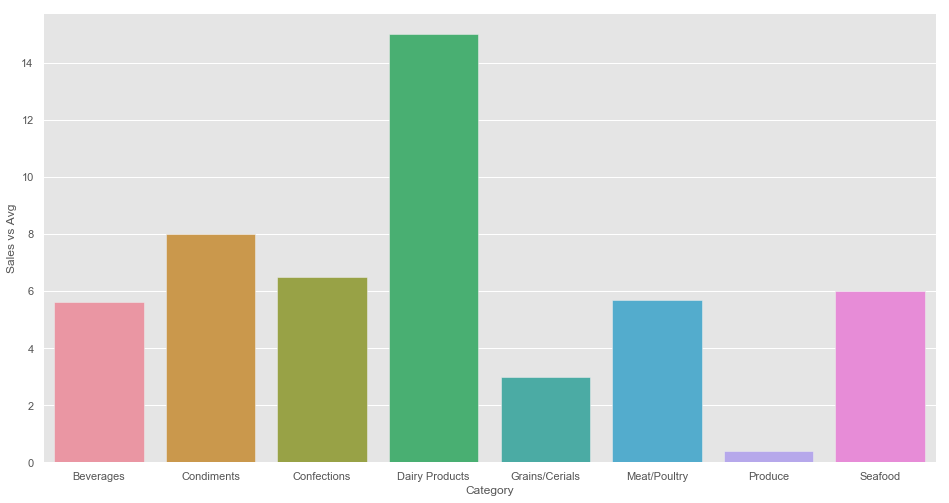

In [56]:
sns.set(rc={'figure.figsize':(16,8.27)})
plt.style.use('ggplot')

ax = sns.barplot(x= "Category", y="Sales vs Avg", data=q4table)

##### Conclusion Question 4 <br>

**Restate the question and hypotheses:**<br>
are there any categories we should think about dicontinuing or expanding on?<br>

𝐻𝑂: orders of categories are equal in quantity <br>
𝐻𝑎: orders by category are not equal <br>

The test fails to reject the null for category 5 and 7; these seem to be categories with moderate sales.
We can reject the null for categories 1, 2, 3, 4, 6 and 8.  Category 4 especially stands out with the lowest P-value and highest test statistic.  We should further inspect this product and look to duplicate its success. 